In [1]:
import pandas as pd

Here we will do some exploratory Analysis: Counting the words, put them into relation with other words and display them so we one can quickly understand how the choice of words for each rapper looks like.


Let's load the data we aggregated in the the Notebookt 'Data Preprocessing' into a Dataframe and transpose it

In [2]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2Pac,Cardi B,Eminem,J. Cole,Joyner Lucas,Juice WRLD,Kanye West,Lil Pump,Logic,Mac Miller,Nas,Nicki Minaj,Notorious B.I.G.
aa,0,0,1,0,0,0,1,0,1,0,0,0,0
aaaaaaack,0,0,1,0,0,0,0,0,0,0,0,0,0
aaaaahhh,0,0,0,0,0,0,1,0,0,0,0,0,0
aaaaahhhh,0,0,0,0,0,0,1,0,0,0,0,0,0
aaaaayyyyooooo,0,0,0,0,0,0,0,0,0,0,0,1,0


## Most common words

In [3]:
top_30_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_30_dict[c] = list(zip(top.index, top.values))
    
top_30_dict

{'2Pac': [('im', 2530),
  ('nibbas', 1607),
  ('nibba', 1600),
  ('got', 1474),
  ('like', 1377),
  ('dont', 1262),
  ('aint', 1126),
  ('cause', 1070),
  ('know', 1021),
  ('life', 878),
  ('just', 820),
  ('fuck', 807),
  ('time', 738),
  ('shit', 720),
  ('ya', 696),
  ('love', 692),
  ('thug', 647),
  ('die', 581),
  ('let', 579),
  ('thats', 575),
  ('yeah', 575),
  ('wanna', 536),
  ('baby', 502),
  ('em', 488),
  ('make', 480),
  ('way', 479),
  ('come', 459),
  ('man', 450),
  ('bitch', 439),
  ('game', 417)],
 'Cardi B': [('like', 373),
  ('im', 340),
  ('bitch', 292),
  ('dont', 244),
  ('got', 161),
  ('know', 151),
  ('cardi', 147),
  ('money', 141),
  ('bag', 141),
  ('yeah', 133),
  ('trick', 130),
  ('shit', 124),
  ('just', 117),
  ('bitches', 109),
  ('fuck', 108),
  ('aint', 107),
  ('nibba', 105),
  ('want', 95),
  ('nibbas', 91),
  ('ass', 89),
  ('pussy', 85),
  ('gon', 85),
  ('bad', 81),
  ('woo', 79),
  ('make', 79),
  ('drip', 79),
  ('look', 77),
  ('thats', 6

Let's see the top 15 words for each artist.

In [4]:
# top 15 words for each rapper
for rapper, top_words in top_30_dict.items():
    print(rapper)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('===============================================================')

2Pac
im, nibbas, nibba, got, like, dont, aint, cause, know, life, just, fuck, time, shit
Cardi B
like, im, bitch, dont, got, know, cardi, money, bag, yeah, trick, shit, just, bitches
Eminem
im, like, just, dont, cause, got, shit, know, aint, fuck, youre, yeah, say, em
J. Cole
im, nibba, like, nibbas, got, aint, dont, know, shit, yeah, just, man, cause, love
Joyner Lucas
im, dont, just, like, got, yeah, aint, know, nibba, shit, fuck, love, need, wanna
Juice WRLD
im, yeah, like, dont, bitch, got, uh, know, fuck, love, aint, shit, oh, ayy
Kanye West
im, like, know, dont, got, just, yeah, oh, aint, love, thats, shit, nibba, say
Lil Pump
ooh, yeah, bitch, like, im, got, dont, brr, huh, lil, gucci, fuck, uh, chyeah
Logic
im, like, know, yeah, just, shit, dont, got, aint, fuck, man, cause, thats, uh
Mac Miller
im, yeah, like, just, dont, got, know, aint, shit, love, fuck, cause, life, time
Nas
im, nibbas, like, got, know, dont, nibba, cause, man, shit, just, love, nas, life
Nicki Minaj
im, li

It's pretty clear what kind of words are popular among rappers, however, there are lots of stopwords.

Stopwords are words, that aren't necessary nonsensical but they also don't really contribute to the meaning of a sentence, e.g. "and", etc. These kinds of words are used very often in human language. Hence we filter them out by selecting the words that are most frequent.

In [5]:
from collections import Counter
words = []
for rapper in data.columns:
    top = [word for (word, count) in top_30_dict[rapper]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()

[('im', 13),
 ('got', 13),
 ('like', 13),
 ('dont', 13),
 ('aint', 13),
 ('know', 13),
 ('just', 13),
 ('fuck', 13),
 ('shit', 13),
 ('yeah', 13),
 ('thats', 12),
 ('make', 12),
 ('love', 11),
 ('bitch', 11),
 ('cause', 10),
 ('time', 10),
 ('wanna', 10),
 ('nibbas', 9),
 ('nibba', 9),
 ('em', 8),
 ('man', 8),
 ('want', 8),
 ('let', 7),
 ('come', 7),
 ('life', 6),
 ('oh', 6),
 ('right', 6),
 ('way', 5),
 ('gon', 5),
 ('need', 5),
 ('say', 5),
 ('uh', 5),
 ('money', 4),
 ('feel', 4),
 ('look', 3),
 ('tell', 3),
 ('ya', 2),
 ('die', 2),
 ('baby', 2),
 ('bitches', 2),
 ('think', 2),
 ('hey', 2),
 ('black', 2),
 ('ayy', 2),
 ('huh', 2),
 ('ima', 2),
 ('yo', 2),
 ('thug', 1),
 ('game', 1),
 ('cardi', 1),
 ('bag', 1),
 ('trick', 1),
 ('ass', 1),
 ('pussy', 1),
 ('bad', 1),
 ('woo', 1),
 ('drip', 1),
 ('youre', 1),
 ('ill', 1),
 ('fuckin', 1),
 ('little', 1),
 ('shady', 1),
 ('said', 1),
 ('girl', 1),
 ('buck', 1),
 ('la', 1),
 ('told', 1),
 ('uhhuh', 1),
 ('run', 1),
 ('woah', 1),
 ('ooh', 1

In [6]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['im',
 'got',
 'like',
 'dont',
 'aint',
 'know',
 'just',
 'fuck',
 'shit',
 'yeah',
 'thats',
 'make',
 'love',
 'bitch',
 'cause',
 'time',
 'wanna',
 'nibbas',
 'nibba',
 'em',
 'man',
 'want',
 'let',
 'come']

Okay, now we have cleansed our data even in terms of semantics. Let's store these files.

In [7]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [8]:
from wordcloud import WordCloud

wc_no_stopwords = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
              max_font_size=150, random_state=43)

## Wordcloud without stop words

Here comes the first fun parts - Wordclouds are fun! At least they look fun. And the quickly (and imho aesthetically) show which words are the most frequently used ones.

If you're familiar with some of these artist, might see some sort of correlation between these insights and the text they usually talk about. Of course, words like "you're", which can be interpreted as a stopword, are still in there. But for now this should suffice in order to get some first interesting insights!

2Pac was known for his lyircs about his tough life in the ghetto - hence 'life', 'thug' and 'die' are the most prominent words in his wordcloud.

I mentioned previously that "you're" can be considered a stopword, however in the case of Eminem, this can mean that he often directly addresses someone. In fact, many of his famous tracks have an aggressive and criticizing overtone and make disputed situations a subject of discussion. He does this by directly speaking to someone directly (through his music) about his displease.

We could continue like this for the other artists as well, but this would make me write a whole paragraph. Maybe you might want to try to get some interesting insights from the visualizations. For instance, Mac Miller's relaxing tracks correlate well with "life". Juice WRLD's became popular due to his open expression of emotions in his text - using "feel" frequently seems to be fitting. If you know  Logic's music, you should that he often says "right" in his songs.

One more interesting note: The two female rapper Cardi B and Nicki Minaj especially often use the b-word. Interesting.

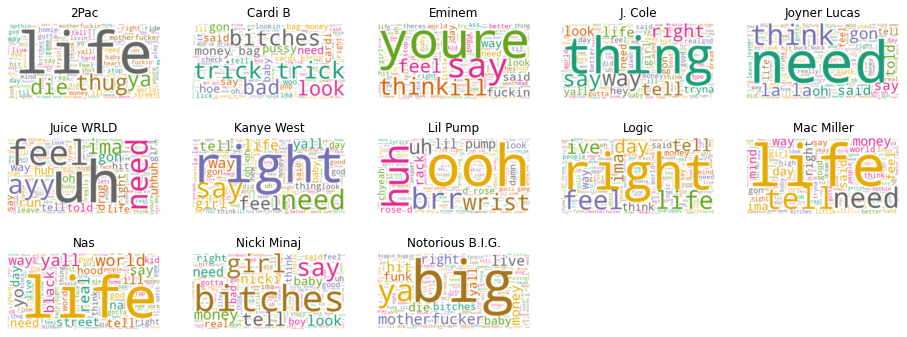

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

rappers = list(data.columns.values)

for i, rapper in enumerate(data.columns):
    wc_no_stopwords.generate(data_clean.lyrics[rapper])
    
    plt.subplot(3, 5, i+1)
    plt.imshow(wc_no_stopwords, interpolation="bilinear")
    plt.axis("off")
    plt.title(rappers[i])
    
plt.show()

## Wordcloud with some stop words

Just out of curiosity, since the the rap genre is dominated by Black musicians, I included a few words that in my optinion might be interesting to see, including the N-word.

And it becomes very clear which rappers don't use the N-word at all and that the N-word is almost used the most for the other rappers.

Eminem's criticism is always underlined with the S- and F-word. 

Juice WRLD uses, along with the female rappers, the B-Word very often.

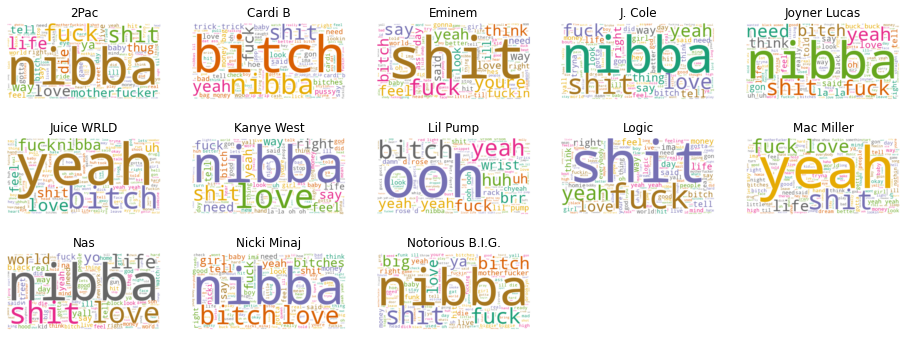

In [10]:
add_stop_words2 = list(set(add_stop_words) - set(['fuck', 'shit', 'yeah', 'bitch', 'love', 'nibbas', 'nibba']))
stop_words2 = text.ENGLISH_STOP_WORDS.union(add_stop_words2)
wc_w_stopwords = WordCloud(stopwords=stop_words2, background_color="white", colormap="Dark2",
              max_font_size=150, random_state=43)

for index, rapper in enumerate(data.columns):
    wc_w_stopwords.generate(data_clean.lyrics[rapper])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc_w_stopwords, interpolation="bilinear")
    plt.axis("off")
    plt.title(rappers[index])
    
plt.show()

What about the Vocabulary each rapper uses? 

In [11]:
## Number of Words
unique_list = []
for rapper in data.columns:
    uniques = data[rapper].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
data_words = pd.DataFrame(list(zip(rappers, unique_list)), columns=['rapper', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,rapper,unique_words
7,Lil Pump,2126
1,Cardi B,2403
4,Joyner Lucas,4783
12,Notorious B.I.G.,6211
3,J. Cole,6525
11,Nicki Minaj,7470
8,Logic,8501
5,Juice WRLD,8624
0,2Pac,9679
9,Mac Miller,9945


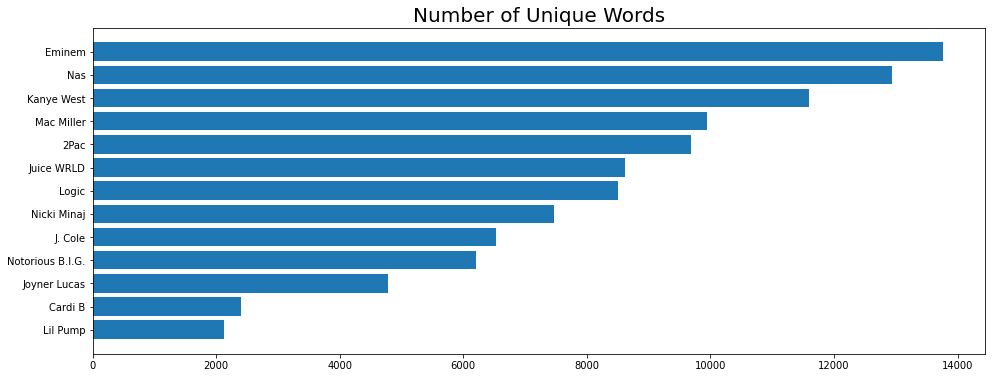

In [12]:
import numpy as np

y = np.arange(len(data_words))

plt.plot(1, 2, 1)
plt.barh(y, data_unique_sort.unique_words, align='center')
plt.yticks(y, data_unique_sort.rapper)
plt.title('Number of Unique Words', fontsize=20)
plt.show()

I am personally a fan of Eminem especially because of his text and the incredible number of unique words he uses might be a reason. Here is small fun fact:
<img src='./images/eminem dictionary.PNG' width="500">

Lil Pump got very famous with his single [Gucci Gang](https://www.youtube.com/watch?v=4LfJnj66HVQ). Give it a try, it is less than 2 minutes long (excluding the intro of ~15 seconds). You might see where his small vocabulary in the text comes from.

## Profanity

Rap is very well known for their "strong" language that is used very frequently. I will conclude the following three profanity words: 'f\*ck', 'sh\*t' and 'b\*tch'. I will refer to these as F-word, S-word and B-word in the following analysis.

In [13]:
swear_words = data.transpose()[['fuck', 'shit', 'bitch']]
swear_words_df = pd.concat([swear_words.fuck, swear_words.shit,
                            swear_words.bitch], axis=1)
swear_words_df.columns = ['f_word', 's_word', 'b_word']
swear_words_df

,f_word,s_word,b_word
2Pac,807,720,439
Cardi B,108,124,292
Eminem,777,902,433
J. Cole,305,709,242
Joyner Lucas,327,349,195
Juice WRLD,1599,1251,2182
Kanye West,503,723,446
Lil Pump,172,93,483
Logic,594,909,325
Mac Miller,596,824,453


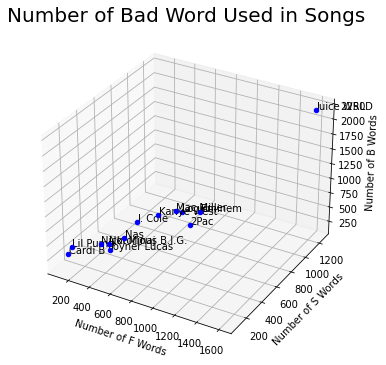

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, rapper in enumerate(swear_words_df.index):
    x = swear_words_df.f_word.loc[rapper]
    y = swear_words_df.s_word.loc[rapper]
    z = swear_words_df.b_word.loc[rapper]
    ax.scatter(x, y, z, color='blue')
    ax.text(x+1.5, y+0.5, z+0.5,rappers[i], fontsize=10)
    
plt.title('Number of Bad Word Used in Songs', fontsize=20)
ax.set_xlabel('Number of F Words')
ax.set_ylabel('Number of S Words')
ax.set_zlabel('Number of B Words')

plt.show()

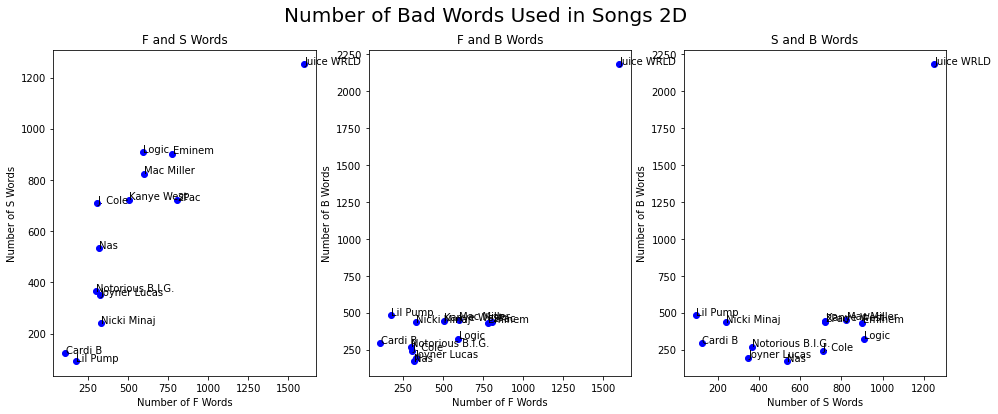

In [15]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
fig.suptitle('Number of Bad Words Used in Songs 2D', fontsize=20)
fig.subplots_adjust(hspace = 1)
for i, rapper in enumerate(swear_words_df.index):
    f_words = swear_words_df.f_word.loc[rapper]
    s_words = swear_words_df.s_word.loc[rapper]
    b_words = swear_words_df.b_word.loc[rapper]
    
    axs1.scatter(f_words, s_words, color='blue')
    axs1.text(f_words+1.5, s_words+0.5, rappers[i], fontsize=10)
    axs1.set(xlabel='Number of F Words', ylabel='Number of S Words')
    axs1.set_title('F and S Words')
    
    axs2.scatter(f_words, b_words, color='blue')
    axs2.text(f_words+1.5, b_words+0.5, rappers[i], fontsize=10)
    axs2.set(xlabel='Number of F Words', ylabel='Number of B Words')
    axs2.set_title('F and B Words')
    
    axs3.scatter(s_words, b_words, color='blue')
    axs3.text(s_words+1.5, b_words+0.5, rappers[i], fontsize=10)
    axs3.set(xlabel='Number of S Words', ylabel='Number of B Words')
    axs3.set_title('S and B Words')

plt.show()

It is interesting that to see Logic keeps up with Eminem in terms of how often he uses the F- and S-words. However usually, at least from my perspective, while Eminem often uses the S-word in a more angry context, Logic refers to many things he does really good as 'sh\*t', e.g. 'Rapsh\*t'. 

Even more interesting, Juice WRLD's career started much later. In fact, his career was the youngest one from all the listed rappers in this Analysis. Sadly, his career also ende very early due to a tragic event. Nonetheless, a shorter overall career also means less text to collect and analyze. But he is still on the top when using the Profanity Words.